# 不動産取引価格情報APIからデータを取得

In [1]:
!pip install requests
!pip3 install matplotlib

In [2]:
import json
import csv
import requests
import pandas as pd
 
#url = "https://www.land.mlit.go.jp/webland/api/TradeListSearch?from=20151&to=20202&city=13102"
url = "https://www.land.mlit.go.jp/webland/api/TradeListSearch?from=20192&to=20202&area=13"

response = requests.get(url)
jsonData = response.json()
 
#Get keys
keys=[]
data_num = len(jsonData["data"])
 
for i in range(data_num):
    keys.extend(list(jsonData["data"][i].keys()))
keys = set(keys)
 
#Get data
output=[keys]
for i in range(data_num):
    temp=[]
    for key in keys:
        try:
            temp.append(jsonData["data"][i][key])
        except:
            temp.append("NaN")
    output.append(temp)

In [3]:
#Export CSV file
with open("output1.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(output)

# データを見やすいように整形

In [4]:
import os
import pandas as pd
import csv

df = pd.read_csv("output1.csv")
df = pd.DataFrame(df)
df

df1 = df.dropna(subset=["FloorPlan"])
df1 = df1.loc[:, ["Municipality",'TradePrice','FloorPlan','Period',]]
df2 = df1[(df1['Municipality'] == "千代田区")]

df2['Period'] = df2['Period'].str.replace('四半期', '')
df2["Period"] = df2["Period"].str.replace('年第', '')
df2["Period"] = df2["Period"].str.replace('１', '1').str.replace('２', '2').str.replace('３', '3').str.replace('４', '4')
df2

/var/folders/hk/twbvbm8j0pzdtg49fgk6bz8r0000gn/T/ipykernel_8067/3885492332.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Period'] = df2['Period'].str.replace('四半期', '')
/var/folders/hk/twbvbm8j0pzdtg49fgk6bz8r0000gn/T/ipykernel_8067/3885492332.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Period"] = df2["Period"].str.replace('年第', '')
/var/folders/hk/twbvbm8j0pzdtg49fgk6bz8r0000gn/T/ipykernel_8067/3885492332.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

Municipality  TradePrice FloorPlan Period
2           千代田区    65000000      ３ＬＤＫ  20201
3           千代田区    40000000      １ＬＤＫ  20193
4           千代田区   130000000      ３ＬＤＫ  20193
5           千代田区    36000000      １ＬＤＫ  20193
8           千代田区   100000000      ２ＬＤＫ  20192
..           ...         ...       ...    ...
388         千代田区   100000000      ２ＬＤＫ  20201
389         千代田区   190000000      ３ＬＤＫ  20194
390         千代田区    95000000       １ＤＫ  20202
392         千代田区    85000000      １ＬＤＫ  20194
393         千代田区   240000000      ４ＬＤＫ  20193

[284 rows x 4 columns]

# 「FloorPlan」と「TradePrice」の情報を散布図としてグラフ化

Duplicate key in file PosixPath('/Users/ikedakazuto/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  IPAexGothic')
findfont: Font family ['MS Gothic'] not found. Falling back to DejaVu Sans.


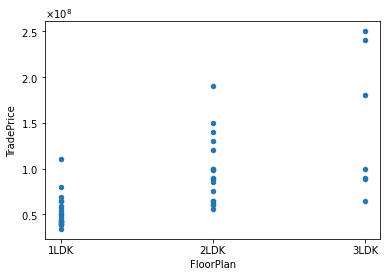

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.ticker import ScalarFormatter
plt.rcParams["font.family"] = "MS Gothic"

period = (df2.Period == "20202") | (df2.Period == "20201")
df3 = df2.loc[period]

df3 = df3.sort_values('FloorPlan')

df3['FloorPlan'] = df3['FloorPlan'].str.replace('１ＬＤＫ', '1LDK').str.replace('２ＬＤＫ', '2LDK').str.replace('３ＬＤＫ', '3LDK')#全角のままだとグラフが文字化けする

floorplan = (df3.FloorPlan == "1LDK") | (df3.FloorPlan == "2LDK") | (df3.FloorPlan == "3LDK")
df3 = df3.loc[floorplan]


ax =df3.plot.scatter(x='FloorPlan', y='TradePrice')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# LIFULL HOMESからスクレイピングで情報を取得

In [6]:
!pip3 install beautifulsoup4

In [7]:
from bs4 import BeautifulSoup
import requests

url = 'https://toushi.homes.co.jp/bukkensearch/tbg[]=2/'

res = requests.get(url)
res.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ja" lang="ja">\n<head>\n  <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta http-equiv="Content-Style-Type" content="text/css" />\n<meta http-equiv="Content-Script-Type" content="text/javascript" />\n<meta name="robots" content="noarchive" />\n\n<title>【ホームズ】一棟マンションを購入する - 収益物件を利回りや価格等で絞り込み ｜ 不動産投資物件[一棟売りマンション・中古一棟マンション]で資産運用</title>\n\n<meta name="description" content="一棟売りマンション一覧 - 収益物件検索｜不動産投資の専門サイト【LIFULL HOME‘S 不動産投資】マンション投資に最適な一棟売りマンションを検索して、価格や想定利回りで比較。資産運用をマンション投資でサポート" />\n<script type="text/javascript" language="javascript" src="/js/library/jquery/jquery-1.8.3.min.js"></script>\n<script type="text/javascript" language="javascript" src="/js/library/jquery/jquery.cookie.js"></script>\n<script type="text/javascript" language="javascript" src="/js/library/jquery/jquery.slides.min.js"></s

In [8]:
soup = BeautifulSoup(res.text, 'html.parser')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html lang="ja" xml:lang="ja" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="noarchive" name="robots"/>
<title>【ホームズ】一棟マンションを購入する - 収益物件を利回りや価格等で絞り込み ｜ 不動産投資物件[一棟売りマンション・中古一棟マンション]で資産運用</title>
<meta content="一棟売りマンション一覧 - 収益物件検索｜不動産投資の専門サイト【LIFULL HOME‘S 不動産投資】マンション投資に最適な一棟売りマンションを検索して、価格や想定利回りで比較。資産運用をマンション投資でサポート" name="description"/>
<script language="javascript" src="/js/library/jquery/jquery-1.8.3.min.js" type="text/javascript"></script>
<script language="javascript" src="/js/library/jquery/jquery.cookie.js" type="text/javascript"></script>
<script language="javascript" src="/js/library/jquery/jquery.slides.min.js" type="text/javascript"></script>
<script language

In [9]:
item_list = soup.find('div', {'class': 'prArea'})
item_list

<div class="prArea">
<div class="prBknList" id="prBknList0">
<div class="prBox">PR</div>
<div class="bknListDetail">
<div class="listDetailTitleArea">
<p class="listDetailTitle">
<span class="u-icon-propertyType_mansion">一棟マンション</span>
<a href="/bukkendetail/index/300720005049/?detailFrom=bmb">中板橋マンション　　担当／石坂</a>
<input id="hid_pr_detail_url0" type="hidden" value="/bukkendetail/index/300720005049/?detailFrom=bmb"/>
</p>
<p class="shopName">協栄建設株式会社</p>
</div><!-- /listDetailTitleArea -->
<div class="bknStatusWrapper">
<div class="bknImageArea">
<a href="/bukkendetail/index/300720005049/?detailFrom=bmb"><img alt="外観" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fku692rgvvclyfyd.jpg&amp;width=123&amp;height=80"/></a> <a href="/bukkendetail/index/300720005049/?detailFrom=bmb"><img alt="間取り" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fbdfj2rgvvclyfye.jpg&amp;width=123&amp;height=80"/></a> </div>
<table>
<tr>
<th cl

In [10]:
items = item_list.find_all('div', class_='prBknList')
item = items[0]
item

<div class="prBknList" id="prBknList0">
<div class="prBox">PR</div>
<div class="bknListDetail">
<div class="listDetailTitleArea">
<p class="listDetailTitle">
<span class="u-icon-propertyType_mansion">一棟マンション</span>
<a href="/bukkendetail/index/300720005049/?detailFrom=bmb">中板橋マンション　　担当／石坂</a>
<input id="hid_pr_detail_url0" type="hidden" value="/bukkendetail/index/300720005049/?detailFrom=bmb"/>
</p>
<p class="shopName">協栄建設株式会社</p>
</div><!-- /listDetailTitleArea -->
<div class="bknStatusWrapper">
<div class="bknImageArea">
<a href="/bukkendetail/index/300720005049/?detailFrom=bmb"><img alt="外観" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fku692rgvvclyfyd.jpg&amp;width=123&amp;height=80"/></a> <a href="/bukkendetail/index/300720005049/?detailFrom=bmb"><img alt="間取り" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fbdfj2rgvvclyfye.jpg&amp;width=123&amp;height=80"/></a> </div>
<table>
<tr>
<th class="price">価格</th>
<

In [11]:
rimawari = item.find('span', {'class': 'perNum'}).text
rimawari = rimawari.rstrip("％")
rimawari

'5.70'

In [12]:
#len(item_list.find_all('span', class_='address'))

price = item.find('span', {'class': 'valueNum'}).text
price

'2億2,900万円'

In [13]:
address = item.find('span', {'class': 'address'}).text
address

'東京都板橋区弥生町'

In [14]:
walk = item.find('span', {'class': 'walk'}).text
walk

'東武東上線 中板橋駅 徒歩5分'

In [15]:
#gaikan = item.find({'img': 'src'})
#gaikan
gaikan = item.find('img')['src']
gaikan

'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fku692rgvvclyfyd.jpg&width=123&height=80'

In [16]:
walk = item.find('span', {'class': 'walk'}).text
walk

'東武東上線 中板橋駅 徒歩5分'

# 上で確認した機能を関数化して一括で処理
取得した情報をリスト型で記録

In [45]:
url = 'https://toushi.homes.co.jp/bukkensearch/tbg[]=2/'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
item_list = soup.find('div', {'class': 'prArea'})
items = item_list.find_all('div', class_='prBknList')

bukken_data = []
for item in items:
    data_list = {}
    data_list['address'] = item.find('span', {'class': 'address'}).text
    data_list['walk'] = item.find('span', {'class': 'walk'}).text.splitlines()
    data_list['gaikan'] = item.find('img')['src']
    data_list['price'] = item.find('span', {'class': 'valueNum'}).text
    data_list['rimawari'] = item.find('span', {'class': 'perNum'}).text.rstrip("％")
    
    bukken_data.append(data_list)

In [46]:
bukken_data

[{'address': '東京都練馬区桜台1丁目',
  'walk': ['西武池袋線 桜台駅 徒歩4分'],
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fezyn2rgvvclyivx.jpg&width=123&height=80',
  'price': '1億7,380万円',
  'rimawari': '6.03'},
 {'address': '神奈川県横浜市栄区飯島町',
  'walk': ['JR京浜東北・根岸線 大船駅 バス10分 江ノ電バス「殿谷」下車 徒歩2分'],
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Facyw2rr48o0f7x9.jpg&width=123&height=80',
  'price': '1億7,000万円',
  'rimawari': '7.75'},
 {'address': '兵庫県西宮市染殿町',
  'walk': ['阪神本線 西宮駅 徒歩6分'],
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fosez2rrl7nyyblt.jpg&width=123&height=80',
  'price': '2億8,500万円',
  'rimawari': '4.48'},
 {'address': '東京都練馬区豊玉北4丁目',
  'walk': ['西武池袋線 練馬駅 徒歩8分'],
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fzv3m2rr2ez1wpq6.jpg&width=123&height=80',
  'price': '2億4,800万円',
  'rimawari': '6.33'}]

In [47]:
#リストをデータフレームに変換
df_bukken = pd.DataFrame(bukken_data)
df_bukken

address                                     walk  \
0   東京都練馬区桜台1丁目                         [西武池袋線 桜台駅 徒歩4分]   
1  神奈川県横浜市栄区飯島町  [JR京浜東北・根岸線 大船駅 バス10分 江ノ電バス「殿谷」下車 徒歩2分]   
2     兵庫県西宮市染殿町                          [阪神本線 西宮駅 徒歩6分]   
3  東京都練馬区豊玉北4丁目                         [西武池袋線 練馬駅 徒歩8分]   

                                              gaikan      price rimawari  
0  https://image.homes.co.jp/smallimg/image.php?f...  1億7,380万円     6.03  
1  https://image.homes.co.jp/smallimg/image.php?f...  1億7,000万円     7.75  
2  https://image.homes.co.jp/smallimg/image.php?f...  2億8,500万円     4.48  
3  https://image.homes.co.jp/smallimg/image.php?f...  2億4,800万円     6.33

# CSVとして出力

In [48]:
df_bukken.to_csv('bukken_data.csv')

In [49]:
df = pd.read_csv('bukken_data.csv', index_col=0)
df

address                                       walk  \
0   東京都練馬区桜台1丁目                         ['西武池袋線 桜台駅 徒歩4分']   
1  神奈川県横浜市栄区飯島町  ['JR京浜東北・根岸線 大船駅 バス10分 江ノ電バス「殿谷」下車 徒歩2分']   
2     兵庫県西宮市染殿町                          ['阪神本線 西宮駅 徒歩6分']   
3  東京都練馬区豊玉北4丁目                         ['西武池袋線 練馬駅 徒歩8分']   

                                              gaikan      price  rimawari  
0  https://image.homes.co.jp/smallimg/image.php?f...  1億7,380万円      6.03  
1  https://image.homes.co.jp/smallimg/image.php?f...  1億7,000万円      7.75  
2  https://image.homes.co.jp/smallimg/image.php?f...  2億8,500万円      4.48  
3  https://image.homes.co.jp/smallimg/image.php?f...  2億4,800万円      6.33

In [30]:
!pip3 install -U oauth2client google-api-python-client

In [50]:
import pandas as pd
import gspread
import json
from oauth2client.service_account import ServiceAccountCredentials 

#2つのAPIを記述しないとリフレッシュトークンを3600秒毎に発行し続けなければならない
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']

#認証情報設定
#ダウンロードしたjsonファイル名をクレデンシャル変数に設定（秘密鍵、Pythonファイルから読み込みしやすい位置に置く）
credentials = ServiceAccountCredentials.from_json_keyfile_name('hudousan-1-cbd81da179dc.json', scope)

#OAuth2の資格情報を使用してGoogle APIにログインします。
gc = gspread.authorize(credentials)

#共有設定したスプレッドシートキーを変数[SPREADSHEET_KEY]に格納する。
SPREADSHEET_KEY = '1uow6KXGYDpfNEklXqKh3NXIfP21GCADelPPIMiBaOoI'

#共有設定したスプレッドシートのワークシート1を開く
worksheet = gc.open_by_key(SPREADSHEET_KEY).sheet1

In [51]:
def toAlpha(num):
    if num<=26:
        return chr(64+num)
    elif num%26==0:
        return toAlpha(num//26-1)+chr(90)
    else:
        return toAlpha(num//26)+chr(64+num%26)

col_lastnum = len(df.columns) # DataFrameの列数
row_lastnum = len(df.index)   # DataFrameの行数

"""
cell_list = worksheet.range('A1:'+toAlpha(col_lastnum)+str(row_lastnum))
for cell in cell_list:
    val = df.iloc[cell.row-1][cell.col-1]
    cell.value = val
worksheet.update_cells(cell_list)
"""
cell_list = worksheet.range('A1:'+toAlpha(col_lastnum)+str(row_lastnum+1))
for cell in cell_list:
    if cell.row == 1:
        val = df.columns[cell.col-1]
    else:
        val = df.iloc[cell.row-2][cell.col-1]
    cell.value = val
worksheet.update_cells(cell_list)

"""index名とcolumn名を
cell_list = worksheet.range('A1:'+toAlpha(col_lastnum+1)+str(row_lastnum+1))
for cell in cell_list:
    if cell.col == 1 and cell.row == 1:
        val = ''
    elif cell.col == 1:
        val = df.index[cell.row-2]
    elif cell.row == 1:
        val = df.columns[cell.col-2]
    else:
        val = df.iloc[cell.row-2][cell.col-2]
    cell.value = val
worksheet.update_cells(cell_list)
"""

"index名とcolumn名を\ncell_list = worksheet.range('A1:'+toAlpha(col_lastnum+1)+str(row_lastnum+1))\nfor cell in cell_list:\n    if cell.col == 1 and cell.row == 1:\n        val = ''\n    elif cell.col == 1:\n        val = df.index[cell.row-2]\n    elif cell.row == 1:\n        val = df.columns[cell.col-2]\n    else:\n        val = df.iloc[cell.row-2][cell.col-2]\n    cell.value = val\nworksheet.update_cells(cell_list)\n"